<h1>Individual Planning Report</h1>


<h2>1. Data Description:</h2>

<p>There are two datasets to examine as part of the project. The first dataset "players.csv" contains player-specific information and cumulative play data, with 196 rows and 7 columns. The second dataset is "sessions.csv" which contains information about each individual session played, with 1535 rows and 5 columns.</p>

<h3>players.csv</h3>

<h4>Variables/Columns</h4>
<ol>
    <li><u>experience (chr):</u> A categorical variable used to report the player's experience level ("Beginner", "Amateur", "Regular", "Veteran", "Pro").</li>
    <li><u>subscribe (lgl):</u> A boolean categorical variable used to represent whether the players are subscribed or not subscribed.</li>
    <li><u>hashedEmail (chr):</u> A categorical variable used to recognize each player. Each player has a unique code to identify them by.</li>
    <li><u>played_hours (dbl):</u> A numerical variable used to report the player's total hours played.</li>
    <li><u>name (chr):</u> A categorical variable used to identify the player's name.</li>
    <li><u>Age (dbl):</u> A numerical variable used to report the player's age.</li>
</ol>

<h3>sessions.csv</h3>

<h4>Variables/Columns</h4>
<ol>
    <li><u>hashedEmail (chr):</u> A categorical variable used to recognize each player. Each player has a unique code to identify them by.</li>
    <li><u>start_time (chr):</u> The date and time of each session start stored as a character.</li>
    <li><u>end_time (chr):</u> The date and time of each session end stored as a character.</li>
    <li><u>original_start_time (dbl):</u> A numerical variable used as a Unix time identifier to represent the start time.</li>
    <li><u>original_end_time (dbl):</u> A numerical variable used as a Unix time identifier to represent the end time.</li>
</ol>


<h2>2. Questions:</h2>


<p><b>Broad question to address:</b> We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.</p>
<p><b>Specific question to address:</b> Can a player's age and skill level predict their total playtime in the dataset?</p>

<h2>3. Exploratory Data Analysis and Visualization</h2>


In [ ]:
library(tidyverse)

In [ ]:
players <- read_csv("players.csv")                
glimpse(players)

In [ ]:
sessions <- read_csv("sessions.csv")
glimpse(sessions)

<p>Since the question concerns <u>Skill Level</u> as the predictor and <u>Total Playtime</u> as the explanatory variable, the question only concerns the "players" dataset.</p>

<h3>Mean Values of Quantitative Variables in players.csv dataset:</h3>

In [ ]:
mean_values_players <- players |>
                       select(played_hours, Age) |>
                       summarize(mean_played_hours =mean(played_hours ,na.rm = TRUE),
                                mean_age =mean(played_hours ,na.rm = TRUE))

mean_values_players

<h3>Exploratory Visualizations</h3>

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


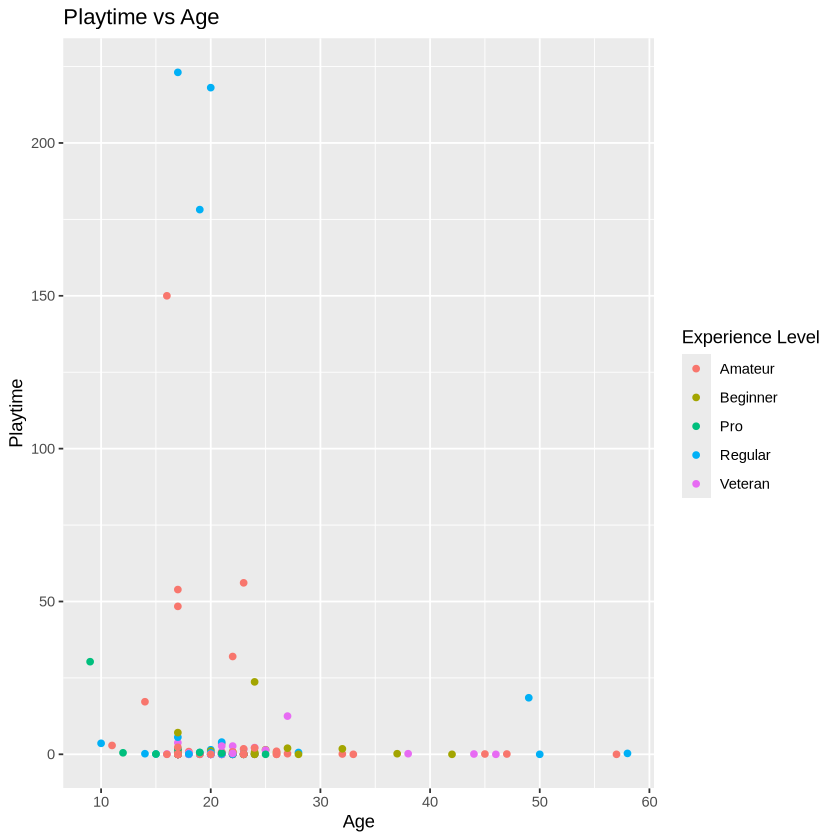

In [55]:
players_plot <- players |>
                ggplot(aes(x= Age, y= played_hours)) +
                geom_point(aes(color = experience)) +
                labs(color= "Experience Level", x= "Age", y= "Playtime", title= "Playtime vs Age")

players_plot

<p>The visualisation is a scatterplot of Playtime vs Age color-coded by skill level. This helps determine whether differences in play time can be explained by players’ skill level, their age, or both.</p>